# Telecommunication Customer Churn Prediction

###  Exploratory Data Analysis
###  Feature Enigineering 
###  Finding Insights
###  Model Buliding
###  Hyperparameters-tunning Model
###  Comparison of Predictive Models

#### Summary of the insights that is obtained from this analysis:

1. The overall number of customers those have churned is 48.6% (2287), while the customers who remained with comapny are 51.4% (2421).
2. Average delay in payment for customers who are 19 days, and for those who did not churn are 9 days.
3. Customer churning increase after 15 days delay in payment.
4. Customer churn and delay in payment are 46% possitively correlated.
5. Maximum number of customer complaints are about billing problem and call quality.
6. The churn rate is very high for customer with call quality complaint.
7. Customer in the gold plan type tends to churn more.
8. In the first 15-20 days of opening an account, the rate of customer churn increases; while, after crossing 20 days, the churn rate declines. 
9. The most important features for predicting churn of customers are Avg_Payment_Delays_Days, MOM_Percent_Increase, Avg_Calls_Weekdays, Last_Bill_Amt, Avg_Total_Calls, Complaint_Type and Account_Age.


In [1]:
# import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve,auc

In [2]:
# Removes Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data into a pandas DataFrame named data:

data= pd.read_csv('Telecom_Data.csv')

# After loading data, take a view of data

data.head(5)

,Churn,Churn Code,Last Bill Amt,Avg Total Calls,Avg Calls Weekdays,Account Age,MOM Percent Increase,Plan Type,Complaint Type,Avg Payment Delays Days,Tech Complaints,Current Days Pending Work,Handset Age,Condition of Gadget,Avg Hours Pending Work
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [4]:
# Check the number of rows and columns in the dataset:
# This dataste has 4708 rows and 15 columns.

data.shape

(4708, 15)

### Data Cleaning 

In [5]:
#First check if the dataset has any missing values

data.isnull().values.any()

True

In [6]:
# Take a view of the datatypes of coumns and
# which columns have missing values

data.info()

# It seems that "Complaint_Type" & "Condition of Gadget " have got missing values in them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
Churn                        4708 non-null object
Churn Code                   4708 non-null int64
Last Bill Amt                4708 non-null int64
Avg Total Calls              4708 non-null float64
Avg Calls Weekdays           4708 non-null float64
Account Age                  4708 non-null int64
MOM Percent Increase         4708 non-null float64
Plan Type                    4708 non-null object
Complaint Type               4701 non-null object
Avg Payment Delays Days      4708 non-null float64
Tech Complaints              4708 non-null int64
Current Days Pending Work    4708 non-null float64
Handset Age                  4708 non-null int64
Condition of  Gadget         4264 non-null float64
Avg Hours Pending Work       4708 non-null float64
dtypes: float64(7), int64(5), object(3)
memory usage: 551.8+ KB


In [7]:
# First lets remove the space in column name with underscore

data.columns=data.columns.str.replace(' ','_')

In [8]:
# Lets see the new names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
Churn                        4708 non-null object
Churn_Code                   4708 non-null int64
Last_Bill_Amt                4708 non-null int64
Avg_Total_Calls              4708 non-null float64
Avg_Calls_Weekdays           4708 non-null float64
Account_Age                  4708 non-null int64
MOM_Percent_Increase         4708 non-null float64
Plan_Type                    4708 non-null object
Complaint_Type               4701 non-null object
Avg_Payment_Delays_Days      4708 non-null float64
Tech_Complaints              4708 non-null int64
Current_Days_Pending_Work    4708 non-null float64
Handset_Age                  4708 non-null int64
Condition_of__Gadget         4264 non-null float64
Avg_Hours_Pending_Work       4708 non-null float64
dtypes: float64(7), int64(5), object(3)
memory usage: 551.8+ KB


### Descriptive Analysis

In [9]:
# Lets the descriptive statistics of the Numerical and categorical variable.

data.describe()

,Churn_Code,Last_Bill_Amt,Avg_Total_Calls,Avg_Calls_Weekdays,Account_Age,MOM_Percent_Increase,Avg_Payment_Delays_Days,Tech_Complaints,Current_Days_Pending_Work,Handset_Age,Condition_of__Gadget,Avg_Hours_Pending_Work
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [10]:
data.describe(include='object')

,Churn,Plan_Type,Complaint_Type
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


In [11]:
# Change the variables datatype
# From the above description we can see that some of the variable have min 0 and max 1, so they are basically categorical features

data['Churn_Code']=data.Churn_Code.astype('object')
data['Condition_of__Gadget']=data.Condition_of__Gadget.astype('object')
data['Tech_Complaints']=data.Tech_Complaints.astype('object')
data['Churn_Code']=data.Churn_Code.astype('int64')

In [12]:
# Statistical description of categorical values

data.describe(include='object')


,Churn,Plan_Type,Complaint_Type,Tech_Complaints,Condition_of__Gadget
count,4708,4708,4701,4708,4264.0
unique,2,2,6,11,3.0
top,No Churn,Silver,Billing Problem,0,1.0
freq,2421,3914,2908,3589,4186.0


In [13]:
# Missing values 
# Percentage of missing Values present in every column

missing_count = data.isnull().sum().sort_values(ascending = False)
missing_percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_value = pd.concat([missing_count, missing_percent ], axis = 1)
missing_value

,0,1
Condition_of__Gadget,444,9.430756
Complaint_Type,7,0.148683
Avg_Hours_Pending_Work,0,0.000000
Handset_Age,0,0.000000
Current_Days_Pending_Work,0,0.000000
Tech_Complaints,0,0.000000
Avg_Payment_Delays_Days,0,0.000000
Plan_Type,0,0.000000
MOM_Percent_Increase,0,0.000000
Account_Age,0,0.000000


In [14]:
# Since both the cloumns with missing values are categorical.
# we will impute the values of both of complaint code and condition_of_current_handset with the most occuring values (mode)

data.Complaint_Type.value_counts()


Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Type, dtype: int64

In [15]:
data.Condition_of__Gadget.value_counts()


1.0    4186
2.0      74
3.0       4
Name: Condition_of__Gadget, dtype: int64

In [16]:
data['Complaint_Type'].fillna(data['Complaint_Type'].mode().index[0], inplace=True)
data['Condition_of__Gadget'].fillna(data['Condition_of__Gadget'].mode().index[0], inplace=True)

In [17]:
# No missing values any more
data.isnull().values.any()

False


### Exploring the data with Statistical overview, Correlation and Visualization


In [18]:
## Inspect the target feature to see number of customers have churned

data['Churn'].value_counts(0)

No Churn    2421
Churn       2287
Name: Churn, dtype: int64

In [19]:
## See the percentage of customers have churned

data['Churn'].value_counts(1)*100

No Churn    51.42311
Churn       48.57689
Name: Churn, dtype: float64

In [20]:
# Check the mean attributes of customers who have churned compared to those who have not

Churn_summary = data.groupby('Churn')
Churn_summary.mean()

# from this comapison it can be seen that avarage delaye in payment is 19 day for customers who churned, 
# while average delaye in payment is 9 days for customers remained with company.

,Churn_Code,Last_Bill_Amt,Avg_Total_Calls,Avg_Calls_Weekdays,Account_Age,MOM_Percent_Increase,Avg_Payment_Delays_Days,Current_Days_Pending_Work,Handset_Age,Condition_of__Gadget,Avg_Hours_Pending_Work
Churn,,,,,,,,,,,
Churn,1.0,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,2.498907,11.191517,0.930477,0.960482
No Churn,0.0,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,2.382074,10.453119,0.916150,0.913846


,Churn_Code,Last_Bill_Amt,Avg_Total_Calls,Avg_Calls_Weekdays,Account_Age,MOM_Percent_Increase,Avg_Payment_Delays_Days,Current_Days_Pending_Work,Handset_Age,Condition_of__Gadget,Avg_Hours_Pending_Work
Churn_Code,1.000000,0.019995,0.007375,-0.014987,-0.089890,-0.059899,0.460092,0.002891,0.042373,0.021837,0.002611
Last_Bill_Amt,0.019995,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016123,0.016852
Avg_Total_Calls,0.007375,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.026552,0.013441
Avg_Calls_Weekdays,-0.014987,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.034463,0.013577
Account_Age,-0.089890,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.090686,0.005059
MOM_Percent_Increase,-0.059899,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,0.010198,-0.008848
Avg_Payment_Delays_Days,0.460092,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.022345,0.000168
Current_Days_Pending_Work,0.002891,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.086538,0.029384
Handset_Age,0.042373,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,0.369047,-0.014347
Condition_of__Gadget,0.021837,0.016123,0.026552,0.034463,0.090686,0.010198,0.022345,0.086538,0.369047,1.000000,-0.000401


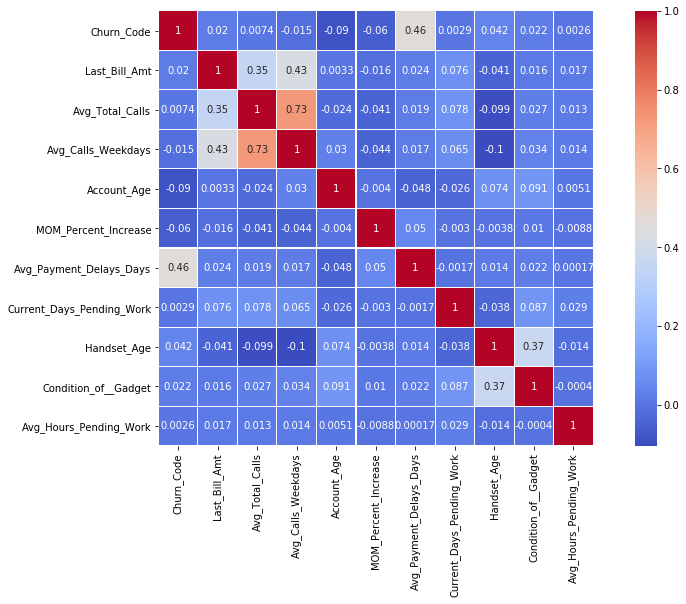

In [21]:
 # Lats check the correlation between our continuous features
    
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.01,
            square=True,
            annot=True,cmap='coolwarm',linecolor="white")
corr
#plt.title('Correlation between features');

## Exploratory Data Analysis (EDA)


### 1. Univariate Analysis

Text(0,0.5,'No of Customers')

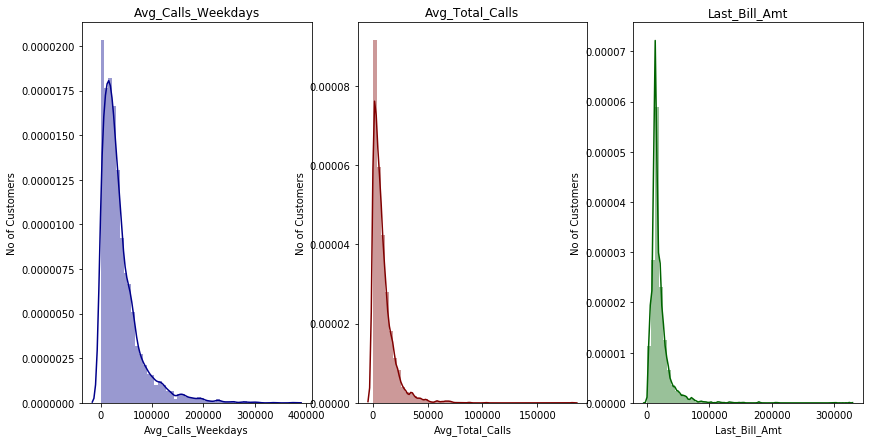

In [22]:
# Distribution graph of the customers for the Avg_Calls_Weekdays, Avg_Total_Calls, and Last_Bill_Amt

f, axes = plt.subplots(ncols=3, figsize=(14, 7))

sns.distplot(data.Avg_Calls_Weekdays, kde=True,  color="darkblue", ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')


sns.distplot(data.Avg_Total_Calls, kde=True,color="maroon", ax=axes[1]).set_title('Avg_Total_Calls')
axes[1].set_ylabel('No of Customers')


sns.distplot(data.Last_Bill_Amt, kde=True, color="darkgreen", ax=axes[2]).set_title('Last_Bill_Amt')
axes[2].set_ylabel('No of Customers')

# All three variables show normal distribution, with right skewnss.

### 2. Bivariate Analysis


Text(0.5,1,'Complaint Type Distribution')

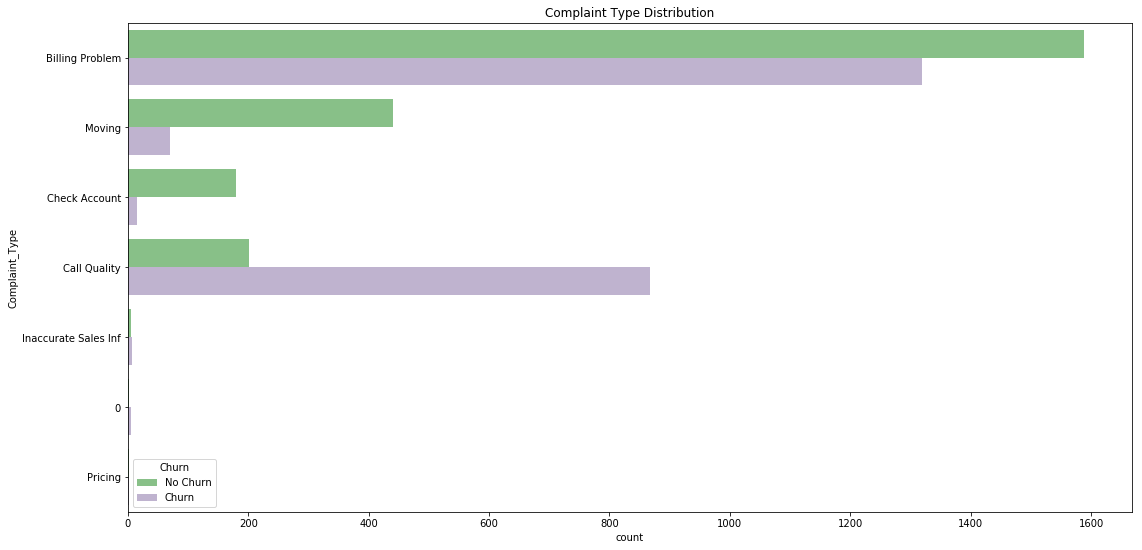

In [23]:
#Inspect whether there is a difference in churn for different types of customer complaints

plt.figure(figsize=(18,9))
p=sns.countplot(y="Complaint_Type", hue='Churn', data=data,palette="Accent")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Complaint Type Distribution')

# It can be seen that most customer with call quality complain have left the comapny.

Text(0.5,1,'Customer Plan_Type Distribution')

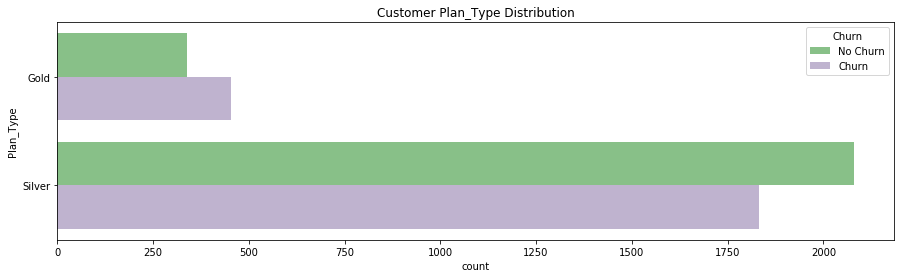

In [24]:
# Check the effect on churn for customers with different plans.

plt.figure(figsize=(15,4))
p=sns.countplot(y="Plan_Type", hue='Churn', data=data,palette="Accent")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Plan_Type Distribution')

# it seems that customer with gold plan

Text(0.5,1,'Customer Tech_Complaints Distribution')

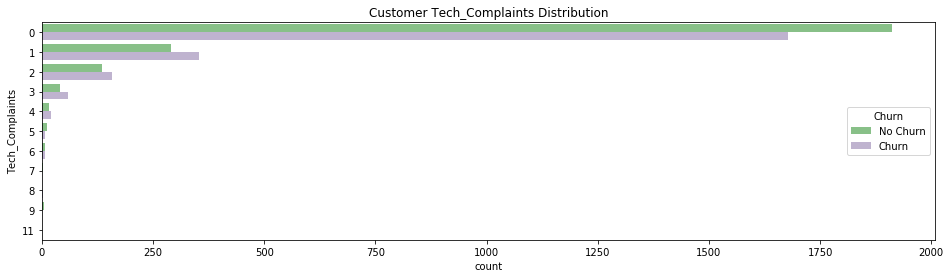

In [25]:
# Check the effect on churn for customers with different tech support complaints.

plt.figure(figsize=(16,4))
p=sns.countplot(y="Tech_Complaints", hue='Churn', data=data,palette="Accent")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Tech_Complaints Distribution')

Text(0.5,1,'Average No of Days Defaluted - churn vs no churn')

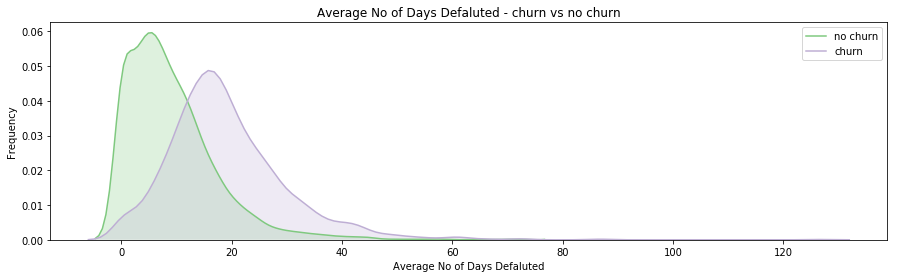

In [26]:
# plot of Avg_Payment_Delays_Days versus Churn_Code

plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 0),'Avg_Payment_Delays_Days'] , color=sns.color_palette("Accent")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 1),'Avg_Payment_Delays_Days'] , color=sns.color_palette("Accent")[1],shade=True, label='churn')
ax.set(xlabel='Average No of Days Defaluted', ylabel='Frequency')
plt.title('Average No of Days Defaluted - churn vs no churn')

# form this plot we see that if the average number of days delinquent is more than 15 days, customers start to churn.

Text(0.5,1,'Account_Age - churn vs no churn')

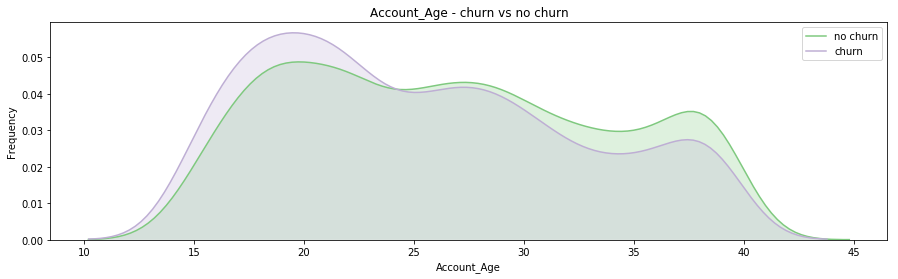

In [27]:
# Plot of Account_Age versus Churn_Code
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 0),'Account_Age'] , color=sns.color_palette("Accent")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 1),'Account_Age'] , color=sns.color_palette("Accent")[1],shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')

# In this plot, we can see that in first 15-20 days of opening an account, the rate of customer churn increases; 
# while, after crossing 20 days, the churn rate declines.

Text(0.5,1,'MOM_Percent_Increase - churn vs no churn')

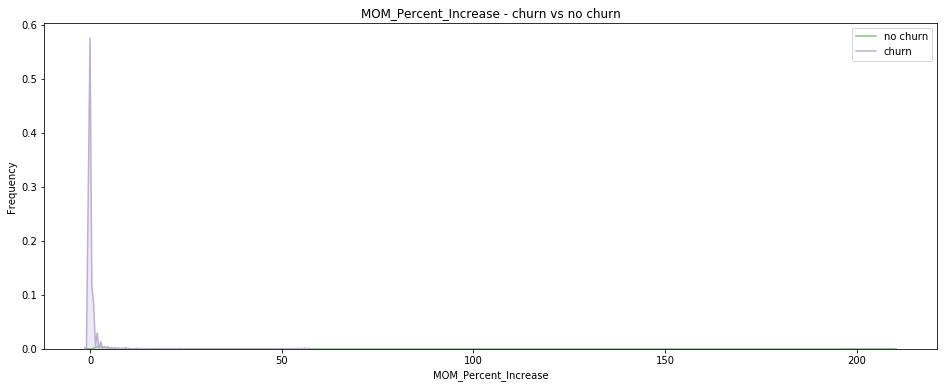

In [28]:
# Plot of MOM_Percent_Increase vs Churn_Code

plt.figure(figsize=(16,6))
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 0),'MOM_Percent_Increase'] , color=sns.color_palette("Accent")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 1),'MOM_Percent_Increase'] , color=sns.color_palette("Accent")[1],shade=True, label='churn')
ax.set(xlabel='MOM_Percent_Increase', ylabel='Frequency')
plt.title('MOM_Percent_Increase - churn vs no churn')


Text(0.5,1,'MOM_Percent_Increase- churn')

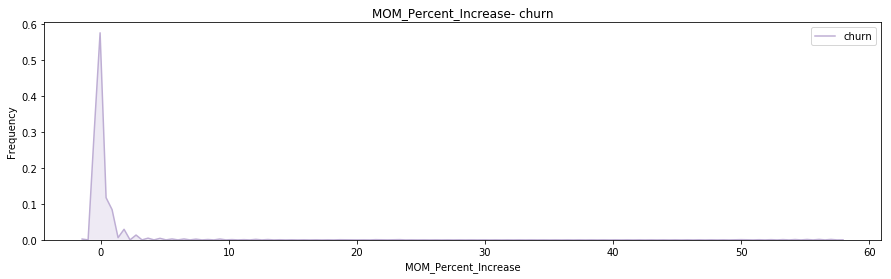

In [29]:
# Plot of MOM_Percent_Increase vs Churn customer

plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 1),'MOM_Percent_Increase'] ,color=sns.color_palette("Accent")[1],shade=True, label='churn')
ax.set(xlabel='MOM_Percent_Increase', ylabel='Frequency')
plt.title('MOM_Percent_Increase- churn')

# From this plot we can see that cutomers with a range of −ve% to +ve%  MOM_Percent_Increase are more like to churn.

Text(0.5,1,'MOM_Percent_Increase- no churn')

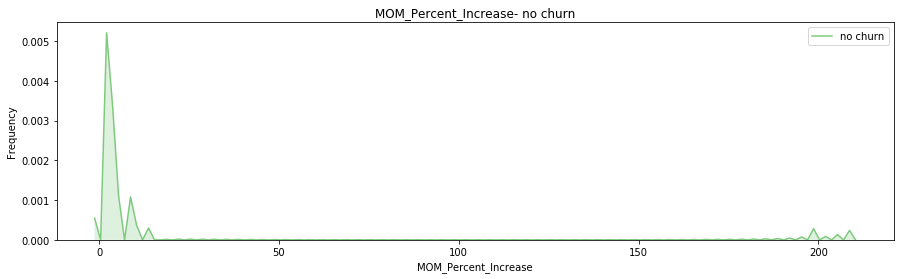

In [30]:
# Plot of MOM_Percent_Increase vs No-Churn customer
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn_Code'] == 0),'MOM_Percent_Increase'] ,color=sns.color_palette("Accent")[0],shade=True, label='no churn')
ax.set(xlabel='MOM_Percent_Increase', ylabel='Frequency')
plt.title('MOM_Percent_Increase- no churn')

## Feature Selection

### The random forest classifier is used here for feature selection

In [31]:
### Encoding the categorical variables

data["Plan_Type"] = data["Plan_Type"].astype('category').cat.codes
data["Complaint_Type"] = data["Complaint_Type"].astype('category').cat.codes

In [32]:
# Split the data into a training and testing set:
target_feat = 'Churn_Code'
X = data.drop(['Churn_Code','Churn'], axis=1)
y=data[target_feat]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

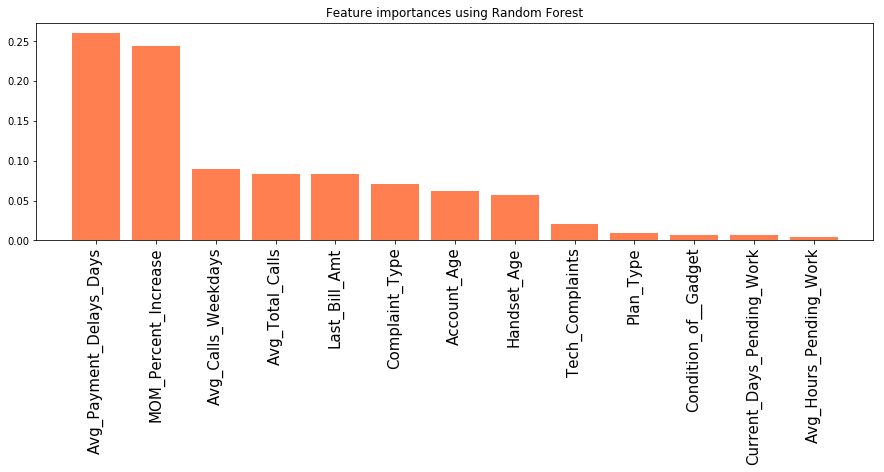

In [34]:
# Performing the feature selection using the random forest classifier model

forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Churn_Code','Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="coral",  align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [42]:
# Selectinf the top 7 features

top7_features = ['Avg_Payment_Delays_Days','MOM_Percent_Increase','Avg_Calls_Weekdays','Last_Bill_Amt','Avg_Total_Calls','Complaint_Type','Account_Age']


## Feature Scaling - Standardization

In [43]:
## Features to be Standardized

top5_features=['Avg_Calls_Weekdays', 'Last_Bill_Amt', 'Avg_Total_Calls', 'Account_Age','Avg_Payment_Delays_Days']

In [44]:
## Features not to be Standardized

top2_features=['MOM_Percent_Increase','Complaint_Type']

In [45]:
scaler = preprocessing.StandardScaler().fit(X_train[top5_features])

In [46]:
Scale_X_train=pd.DataFrame(scaler.transform(X_train[top5_features]),columns = X_train[top5_features].columns)

In [47]:
Scale_X_train_combined=pd.concat([Scale_X_train,  X_train[top2_features].reset_index(drop=True)], axis=1, sort = False)

In [48]:
Scale_X_test=pd.DataFrame(scaler.transform(X_test[top5_features]),columns = X_test[top5_features].columns)


In [49]:
Scale_X_test_combined=pd.concat([Scale_X_test,  X_test[top2_features].reset_index(drop=True)], axis=1, sort=False)


## Model Building

###  Predicting the customer churn using different models

### 1. Random Forest Classifier
### 2. Decision Tree Classifier
### 3. Logistic Regression

### 1. Random Forest Classifier

In [51]:
# Specify the grid of parameters Random Forest Classifier

Rf_parameters = [ {'max_depth': [2,5,7,10], 'min_samples_split' : [2, 5, 10], 'n_estimators' : [20, 50, 100, 150, 200]}]

In [52]:
# Use grid search CV with stratified k-fold to find out the best parameters.

RF_grid = GridSearchCV(RandomForestClassifier(), param_grid = Rf_parameters, cv = StratifiedKFold(n_splits = 10), verbose = 0, n_jobs = -1)


In [53]:
RF_grid.fit(Scale_X_train_combined, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
       

In [54]:
# The best score and best parameters as per Grid search CV

print('best score:', RF_grid.best_score_)
print('best parameters : ', RF_grid.best_estimator_)

best score: 0.802049487628093
best parameters :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [55]:
# Score of the classifier using the test data.
RF_grid.score(Scale_X_test_combined, y_test)

0.826025459688826

In [56]:
# Retraining the model with the best paparmeters defined b Grid search CV
RF_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF_model.fit(Scale_X_train_combined, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
# The new score of classifier after retraining on best estimators
# The model score have increased with best parameters

RF_model.score(Scale_X_test_combined, y_test)


0.8217821782178217

In [58]:
# Predicting the test data with the trained Random Forest Classifier

RF_pred=RF_model.predict(Scale_X_test_combined)

In [59]:
# Creating the classification report to see the Precision, Recall and F1-score

target_names = ['No Churn', 'Churn']
print(classification_report(y_test, RF_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.84      0.80      0.82       364
       Churn       0.80      0.84      0.82       343

    accuracy                           0.82       707
   macro avg       0.82      0.82      0.82       707
weighted avg       0.82      0.82      0.82       707



In [60]:
# Fitiitng the confusion matrix
cm = confusion_matrix(y_test, RF_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

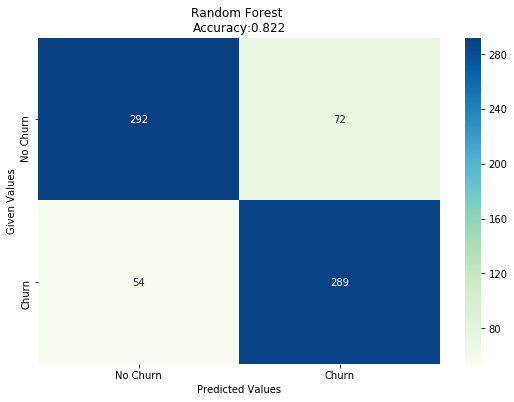

In [61]:
# Plot the confusion matrix
plt.figure(figsize=(9,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='GnBu')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, RF_pred)))
plt.ylabel('Given Values')
plt.xlabel('Predicted Values')
plt.show()

###  2. Decision Tree Classifier

In [63]:
# Training the Decision Tree model
decision_train = DecisionTreeClassifier()

In [64]:
decision_train.fit(X_train[top7_features],y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
# Score of model before Hypertunning
decision_train.score(X_test[top7_features], y_test)


0.7581329561527581

In [66]:
#Specify the grid of parameters Decision Tree Classifier

DT_parameters = {'max_depth': [2,5,7,10], 'min_samples_split' : [2, 5, 10]}


In [67]:
# Use grid search CV with stratified k-fold to find out the best parameters.

DT_rdcv = GridSearchCV(estimator=decision_train,
            param_grid=DT_parameters, cv = StratifiedKFold(n_splits = 10), verbose = 0, n_jobs = -1)

In [68]:
DT_rdcv.fit(Scale_X_train_combined, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 10],
           

In [69]:
# The best score and best parameters as per Grid search CV

print('best score:', DT_rdcv.best_score_)
print('best parameters: ', DT_rdcv.best_estimator_)

best score: 0.7855536115971007
best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [70]:
# Retraining the model with the best paparmeters defined b Grid search CV

DT_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT_model.fit(Scale_X_train_combined, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
# The new score of classifier after retraining on best estimators
# The model score have increased with best parametrs

DT_model.score(Scale_X_test_combined, y_test)


0.8147100424328148

In [72]:
# Predicting the test data with the trained Decision Tree Classifier

DT_pred=DT_model.predict(Scale_X_test_combined)


In [73]:
# Creating the classification report to see the Precision, Recall and F1-score

target_names = ['No Churn', 'Churn']
print(classification_report(y_test, DT_pred, target_names=target_names))


              precision    recall  f1-score   support

    No Churn       0.84      0.79      0.82       364
       Churn       0.79      0.84      0.81       343

    accuracy                           0.81       707
   macro avg       0.82      0.82      0.81       707
weighted avg       0.82      0.81      0.81       707



In [74]:
# Fitiitng the confusion matrix

cm = confusion_matrix(y_test, DT_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

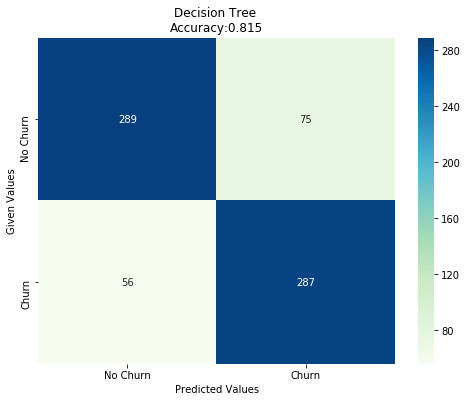

In [75]:
# Plot the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='GnBu')
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, DT_pred)))
plt.ylabel('Given Values')
plt.xlabel('Predicted Values')
plt.show()

### 3. Logistic Regression

In [76]:
# Training the Logistic Regression model

logistic_Train= LogisticRegression(random_state=0, solver='lbfgs')

logistic_Train.fit(X_train[top7_features], y_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
# Score of Logistic Regression before Hypertunning

logistic_Train.score(X_test[top7_features], y_test)

0.7454031117397454

In [78]:
# Specify the grid of parameters Random Forest Classifier

LG_parameters = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [79]:
# Use grid search CV with stratified k-fold to find out the best parameters.

LG_rdcv = GridSearchCV(estimator=logistic_Train,
            param_grid=LG_parameters, cv = StratifiedKFold(n_splits = 10), verbose = 0, n_jobs = -1)

In [80]:
LG_rdcv.fit(Scale_X_train_combined, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
# The best score and best parameters as per Grid search CV

print('best score:', LG_rdcv.best_score_)
print('best parameters: ', LG_rdcv.best_estimator_)

best score: 0.7578105473631592
best parameters:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [82]:
# Retraining the model with the best paparmeters defined b Grid search CV

LG_model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LG_model.fit(Scale_X_train_combined, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# The new score of classifier after retraining on best estimators
# The model score have increased with best parametrs

LG_model.score(Scale_X_test_combined, y_test)


0.7821782178217822

In [84]:
# Predicting the test data with the trained Logistic Regression

LG_pred=LG_model.predict(Scale_X_test_combined)


In [85]:
# Creating the classification report to see the Precision, Recall and F1-score

target_names = ['No Churn', 'Churn']
print(classification_report(y_test, LG_pred, target_names=target_names))


              precision    recall  f1-score   support

    No Churn       0.79      0.79      0.79       364
       Churn       0.78      0.77      0.77       343

    accuracy                           0.78       707
   macro avg       0.78      0.78      0.78       707
weighted avg       0.78      0.78      0.78       707



In [86]:
# Fitiitng the confusion matrix

cm = confusion_matrix(y_test, LG_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

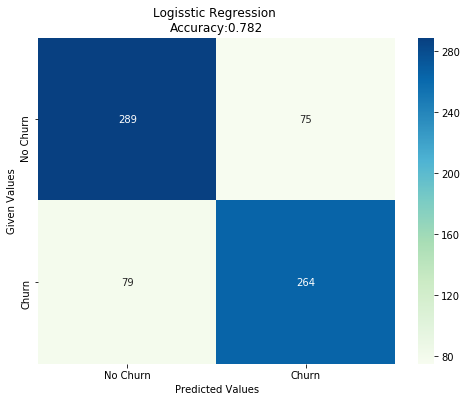

In [87]:
# Plot the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='GnBu')
plt.title('Logisstic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, LG_pred)))
plt.ylabel('Given Values')
plt.xlabel('Predicted Values')
plt.show()

In [88]:
# Making a list of models created with hypertuning for creating ROC curve.

models = [
{
    'label': 'Logistic Regression',
    'model': LG_model,
},
{
    'label': 'Decision Tree',
    'model': DT_model,
},
{
    'label': 'Random Forest',
    'model': RF_model,
}
]


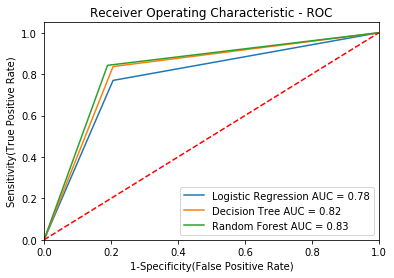

In [89]:
# Plot the ROC curve.

for m in models:
    model = m['model'] 
    model.fit(Scale_X_train_combined, y_train) 
    y_pred=model.predict(Scale_X_test_combined) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic - ROC')
plt.legend(loc="lower right")
plt.show()

# Conclusion

By Comparing the AUC result of different algorithms (logistic regression: 0.78, decision tree: 0.82, and random forest: 0.83), we can conclude that random forest is the best performing model with the AUC score of 0.83 and can be chosen for the marketing team to predict customer churn.